In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

In [24]:
df = pd.read_csv(r"C:\Users\USER\Downloads\EV_Dataset.csv")
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [25]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [27]:
df.isnull()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
96840,False,False,False,False,False,False,False,False
96841,False,False,False,False,False,False,False,False
96842,False,False,False,False,False,False,False,False
96843,False,False,False,False,False,False,False,False


In [28]:
df.dropna

<bound method DataFrame.dropna of          Year Month_Name       Date                     State  \
0      2014.0        jan   1/1/2014            Andhra Pradesh   
1      2014.0        jan   1/1/2014            Andhra Pradesh   
2      2014.0        jan   1/1/2014            Andhra Pradesh   
3      2014.0        jan   1/1/2014            Andhra Pradesh   
4      2014.0        jan   1/1/2014            Andhra Pradesh   
...       ...        ...        ...                       ...   
96840  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96841  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96842  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96843  2023.0        dec  12/1/2023  Andaman & Nicobar Island   
96844  2023.0        dec  12/1/2023  Andaman & Nicobar Island   

                           Vehicle_Class Vehicle_Category Vehicle_Type  \
0                        ADAPTED VEHICLE           Others       Others   
1                   AGRICULTURAL TRAC

In [29]:
le = LabelEncoder()
df['Vehicle_Class_Encoded'] = le.fit_transform(df['Vehicle_Class']) 

In [30]:
X = df.drop(['Vehicle_Class', 'Vehicle_Class_Encoded'], axis=1)
X = pd.get_dummies(X)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X

,Year,EV_Sales_Quantity,Month_Name_apr,Month_Name_aug,Month_Name_dec,Month_Name_feb,Month_Name_jan,Month_Name_jul,Month_Name_jun,Month_Name_mar,...,Vehicle_Type_3W_Goods,Vehicle_Type_3W_Goods_LowSpeed,Vehicle_Type_3W_Personal,Vehicle_Type_3W_Shared,Vehicle_Type_3W_Shared_LowSpeed,Vehicle_Type_4W_Personal,Vehicle_Type_4W_Shared,Vehicle_Type_Bus,Vehicle_Type_Institution Bus,Vehicle_Type_Others
0,2014.0,0.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,0.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2014.0,0.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2014.0,0.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014.0,0.0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96840,2023.0,1.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
96841,2023.0,5.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96842,2023.0,0.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
96843,2023.0,0.0,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [33]:
# 1️⃣ KNN REGRESSOR
y_knn = df['Vehicle_Class_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_knn, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print("📌 KNN Regressor")
print("MSE:", mean_squared_error(y_test, knn_preds))
print("R² Score:", r2_score(y_test, knn_preds))

📌 KNN Regressor
MSE: 461.405301254582
R² Score: -0.18769093096283518


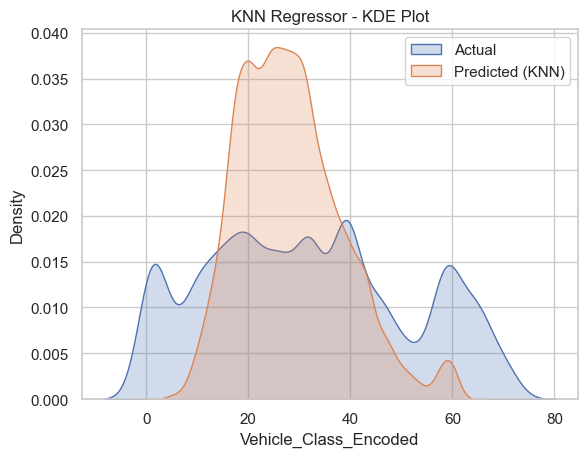

In [34]:
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(knn_preds, label='Predicted (KNN)', fill=True)
plt.title('KNN Regressor - KDE Plot')
plt.legend()
plt.show()

In [35]:
# 2️⃣ DECISION TREE REGRESSOR
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

print("\n📌 Decision Tree Regressor")
print("MSE:", mean_squared_error(y_test, dt_preds))
print("R² Score:", r2_score(y_test, dt_preds))


📌 Decision Tree Regressor
MSE: 352.49575589850883
R² Score: 0.09265018987600815


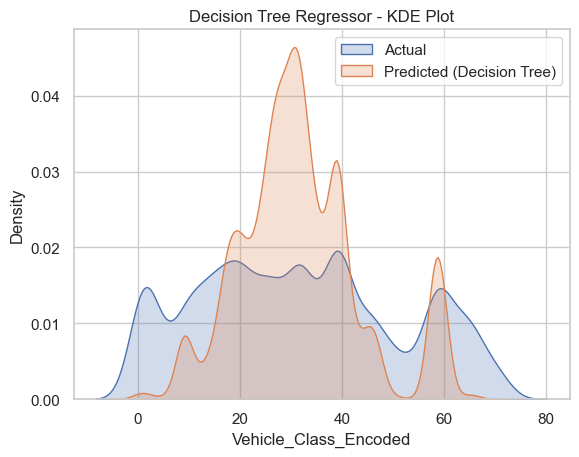

In [36]:
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(dt_preds, label='Predicted (Decision Tree)', fill=True)
plt.title('Decision Tree Regressor - KDE Plot')
plt.legend()
plt.show()

In [37]:
# 3️⃣ NAIVE BAYES CLASSIFIER
# Note: Naive Bayes assumes classification
y_nb = df['Vehicle_Class_Encoded']
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_scaled, y_nb, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train_nb, y_train_nb)
nb_preds = nb.predict(X_test_nb)

print("\n📌 Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test_nb, nb_preds))
print("Classification Report:\n", classification_report(y_test_nb, nb_preds, target_names=le.classes_))



📌 Naive Bayes Classifier
Accuracy: 0.29196138158913726
Classification Report:
                                              precision    recall  f1-score   support

                            ADAPTED VEHICLE       0.33      0.00      0.01       466
                       AGRICULTURAL TRACTOR       0.00      0.00      0.00       646
                                  AMBULANCE       0.00      0.00      0.00       696
                           ANIMAL AMBULANCE       0.00      0.02      0.01        64
               ARMOURED/SPECIALISED VEHICLE       0.01      0.47      0.01        15
                        ARTICULATED VEHICLE       0.00      0.00      0.00       331
                          AUXILIARY TRAILER       0.01      0.33      0.01        15
                              BREAKDOWN VAN       0.00      0.00      0.00        39
                                  BULLDOZER       0.00      0.17      0.00         6
                                        BUS       0.86      0.24     

C:\Users\USER\.anaconda\anaconda_1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\.anaconda\anaconda_1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\.anaconda\anaconda_1\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


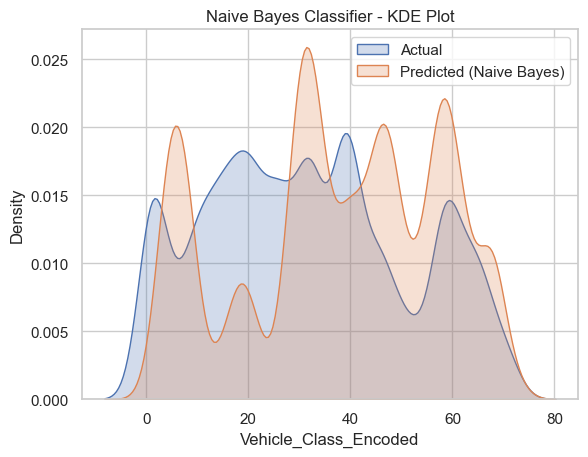

In [38]:
# KDE Plot
sns.kdeplot(y_test_nb, label='Actual', fill=True)
sns.kdeplot(nb_preds, label='Predicted (Naive Bayes)', fill=True)
plt.title('Naive Bayes Classifier - KDE Plot')
plt.legend()
plt.show()

In [39]:
# Define the new row as a dictionary
new_row = {
    'Year': 2015,
    'Month_Name': 'feb',
    'Date': '14/2/2015',
    'State': 'delhi',
    'Vehicle_Class': 'motor bike',
    'Vehicle_Category': '2-wheeler',
    'Vehicle_Type': 'others',
    'EV_Sales_Quantity': 10
}

# Append the row using loc
df.loc[len(df)] = new_row

# Save the updated dataset
updated_path = ("C:/Users/USER/Downloads/EV_Dataset_updated.csv")
df.to_csv(updated_path, index=False)

updated_path


'C:/Users/USER/Downloads/EV_Dataset_updated.csv'

In [40]:
df.tail(1)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Vehicle_Class_Encoded
96845,2015.0,feb,14/2/2015,delhi,motor bike,2-wheeler,others,10.0,NaN


In [41]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Vehicle_Class_Encoded
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0,43.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0,46.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0,58.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0,59.0
96845,2015.0,feb,14/2/2015,delhi,motor bike,2-wheeler,others,10.0,NaN
